# bluesky on Windows sandbox

first try using bluesky on Windows 10

You *want* to run EPICS `caRepeater` on startup or you'll need to answer a dialog the first time every new kernel makes a channel access call.

1. In this directory: `C:\Users\Pete\Apps\Anaconda\envs\bluesky\Lib\site-packages\epics\clibs\win64`
1. Make shortcut of this file: `caRepeater.exe`
1. Move it to this directory: `%APPDATA%\Microsoft\Windows\Start Menu\Programs\Startup`
   (This page shows a quick shortcut to that directory: https://www.howto-connect.com/windows-10-run-program-automatically-at-startup/)

--------

## Lesson 1

following from: https://github.com/BCDA-APS/use_bluesky/blob/master/notebooks/lesson1.py

In [1]:
import time
from ophyd import EpicsMotor, EpicsSignal, Component, Device
from ophyd.scaler import ScalerCH
from bluesky import RunEngine
from databroker import Broker
import bluesky.plans as bp
from APS_BlueSky_tools.devices import use_EPICS_scaler_channels

In [2]:
def myCallback(key, doc):
    print(key, len(doc))
    for k, v in doc.items():
        # print("\t", k, v)
        print("\t", k)
    print("~~~~~~~~~~~~~~~~~")


RE = RunEngine({})

In [3]:
IOC="xxx:"

In [4]:
scaler = ScalerCH(IOC+"scaler1", name="scaler")
scaler.preset_time.put(1.5)
print(scaler.preset_time.value)

1.5


In [5]:
scaler.read()

OrderedDict([('clock', {'value': 6000000.0, 'timestamp': 1542948741.021477}),
             ('I0', {'value': 2.0, 'timestamp': 1542948741.021477}),
             ('scint', {'value': 2.0, 'timestamp': 1542948741.021477}),
             ('', {'value': 0.0, 'timestamp': 1542948741.021477}),
             ('scaler_time', {'value': 0.6, 'timestamp': 1542948741.021477})])

In [6]:
scaler.channels.chan04.chname.put("scint")
scaler.channels.chan07.chname.put("roi1")

scaler.match_names()
use_EPICS_scaler_channels(scaler)
scaler.read()

OrderedDict([('clock', {'value': 6000000.0, 'timestamp': 1542948741.021477}),
             ('I0', {'value': 2.0, 'timestamp': 1542948741.021477}),
             ('scint', {'value': 4.0, 'timestamp': 1542948741.021477}),
             ('roi1', {'value': 3.0, 'timestamp': 1542948741.021477}),
             ('scaler_time', {'value': 0.6, 'timestamp': 1542948741.021477})])

In [7]:
RE(bp.count([scaler], num=3), myCallback)

start 10
	 uid
	 time
	 scan_id
	 plan_type
	 plan_name
	 detectors
	 num_points
	 num_intervals
	 plan_args
	 hints
~~~~~~~~~~~~~~~~~
descriptor 8
	 run_start
	 time
	 data_keys
	 uid
	 configuration
	 name
	 hints
	 object_keys
~~~~~~~~~~~~~~~~~
event 7
	 descriptor
	 time
	 data
	 timestamps
	 seq_num
	 uid
	 filled
~~~~~~~~~~~~~~~~~
event 7
	 descriptor
	 time
	 data
	 timestamps
	 seq_num
	 uid
	 filled
~~~~~~~~~~~~~~~~~
event 7
	 descriptor
	 time
	 data
	 timestamps
	 seq_num
	 uid
	 filled
~~~~~~~~~~~~~~~~~
stop 6
	 run_start
	 time
	 uid
	 exit_status
	 reason
	 num_events
~~~~~~~~~~~~~~~~~


('54e0e8b2-8067-4f2e-9873-603aeebc237d',)

---------------------

# Lesson 2

https://github.com/BCDA-APS/use_bluesky/blob/master/notebooks/lesson2.py

In [8]:
m1 = EpicsMotor(IOC+"m1", name="m1")
time.sleep(1)
print(m1.position)
scaler.preset_time.put(0.5)

1.0


In [9]:
# Since there are no detectors actually connected to this scaler,
# we can change names at our choice.  A real scaler will have
# detectors connected to specific channels and we should not modify
# these names without regard to how signals are physically connected.
scaler.channels.chan01.chname.put("clock")
scaler.channels.chan02.chname.put("I0")
scaler.channels.chan03.chname.put("scint")
scaler.channels.chan04.chname.put("")
scaler.channels.chan05.chname.put("")
scaler.channels.chan06.chname.put("")
scaler.channels.chan07.chname.put("")
scaler.channels.chan08.chname.put("")
scaler.channels.chan09.chname.put("")


scaler.match_names()
use_EPICS_scaler_channels(scaler)
scaler.read()

OrderedDict([('clock', {'value': 16000000.0, 'timestamp': 1542948939.822753}),
             ('I0', {'value': 9.0, 'timestamp': 1542948939.822753}),
             ('scint', {'value': 6.0, 'timestamp': 1542948939.822753}),
             ('scaler_time', {'value': 1.6, 'timestamp': 1542948939.822753})])

In [10]:
RE(bp.scan([scaler], m1, -1, 1, 5), myCallback)

start 14
	 uid
	 time
	 scan_id
	 plan_type
	 plan_name
	 detectors
	 motors
	 num_points
	 num_intervals
	 plan_args
	 hints
	 plan_pattern
	 plan_pattern_module
	 plan_pattern_args
~~~~~~~~~~~~~~~~~
descriptor 8
	 run_start
	 time
	 data_keys
	 uid
	 configuration
	 name
	 hints
	 object_keys
~~~~~~~~~~~~~~~~~
event 7
	 descriptor
	 time
	 data
	 timestamps
	 seq_num
	 uid
	 filled
~~~~~~~~~~~~~~~~~
event 7
	 descriptor
	 time
	 data
	 timestamps
	 seq_num
	 uid
	 filled
~~~~~~~~~~~~~~~~~
event 7
	 descriptor
	 time
	 data
	 timestamps
	 seq_num
	 uid
	 filled
~~~~~~~~~~~~~~~~~
event 7
	 descriptor
	 time
	 data
	 timestamps
	 seq_num
	 uid
	 filled
~~~~~~~~~~~~~~~~~
event 7
	 descriptor
	 time
	 data
	 timestamps
	 seq_num
	 uid
	 filled
~~~~~~~~~~~~~~~~~
stop 6
	 run_start
	 time
	 uid
	 exit_status
	 reason
	 num_events
~~~~~~~~~~~~~~~~~


('fe0cf444-859b-4a70-a059-baacb662b64b',)

------------

## Lesson 3

https://github.com/BCDA-APS/use_bluesky/blob/master/notebooks/lesson3.py

In [11]:
from bluesky.callbacks import LiveTable
from bluesky.callbacks import LivePlot
from bluesky.callbacks.best_effort import BestEffortCallback

%matplotlib notebook
from bluesky.utils import install_qt_kicker
install_qt_kicker()

In [12]:
RE(bp.scan([scaler], m1, 1, 5, 5), LiveTable([m1, scaler]))

+-----------+------------+------------+------------------+------------+------------+-------------+------------+
|   seq_num |       time |         m1 | m1_user_setpoint |         I0 |      clock | scaler_time |      scint |
+-----------+------------+------------+------------------+------------+------------+-------------+------------+
|         1 | 22:56:21.4 |    1.00000 |          1.00000 |          3 |    6000000 |       0.600 |          3 |
|         2 | 22:56:23.4 |    2.00000 |          2.00000 |          2 |    6000000 |       0.600 |          3 |
|         3 | 22:56:25.4 |    3.00000 |          3.00000 |          2 |    6000000 |       0.600 |          3 |
|         4 | 22:56:27.4 |    4.00000 |          4.00000 |          3 |    6000000 |       0.600 |          2 |
|         5 | 22:56:29.4 |    5.00000 |          5.00000 |          2 |    6000000 |       0.600 |          3 |
+-----------+------------+------------+------------------+------------+------------+-------------+------

('b52f048b-c412-4554-be00-2e6ff55ae00c',)

Transient Scan ID: 4     Time: 2018/11/22 22:57:24
Persistent Unique Scan ID: '541bad9a-3019-4556-863d-d79a96be1d52'
New stream: 'primary'
+-----------+------------+------------+------------+------------+
|   seq_num |       time |      clock |         I0 |      scint |
+-----------+------------+------------+------------+------------+


<IPython.core.display.Javascript object>


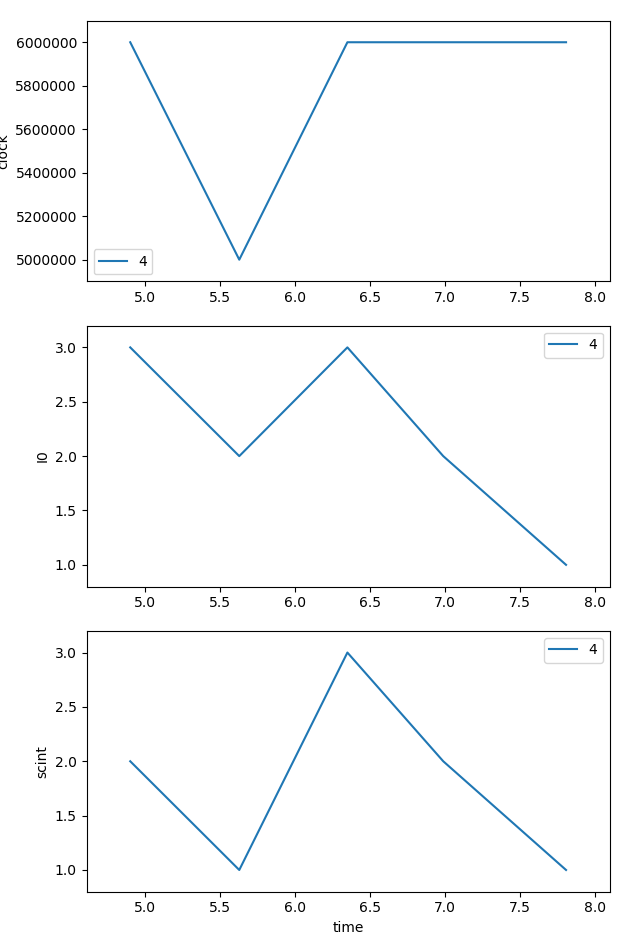

C:\Users\Pete\Apps\Anaconda\envs\bluesky\lib\site-packages\matplotlib\legend.py:1196: MatplotlibDeprecationWarning: 
Legend.draggable() is drepecated in favor of Legend.set_draggable(). Legend.draggable may be reintroduced as a property in future releases.
  message="Legend.draggable() is drepecated in "


|         1 | 22:57:29.6 |    6000000 |          3 |          2 |
|         2 | 22:57:30.4 |    5000000 |          2 |          1 |
|         3 | 22:57:31.1 |    6000000 |          3 |          3 |
|         4 | 22:57:31.7 |    6000000 |          2 |          2 |
|         5 | 22:57:32.5 |    6000000 |          1 |          1 |
+-----------+------------+------------+------------+------------+
generator count ['541bad9a'] (scan num: 4)



Transient Scan ID: 5     Time: 2018/11/22 22:57:32
Persistent Unique Scan ID: 'a87dc859-8b91-4d24-ad42-c9082d8d9e32'
New stream: 'primary'
+-----------+------------+------------+------------+------------+------------+
|   seq_num |       time |         m1 |      clock |         I0 |      scint |
+-----------+------------+------------+------------+------------+------------+


<IPython.core.display.Javascript object>


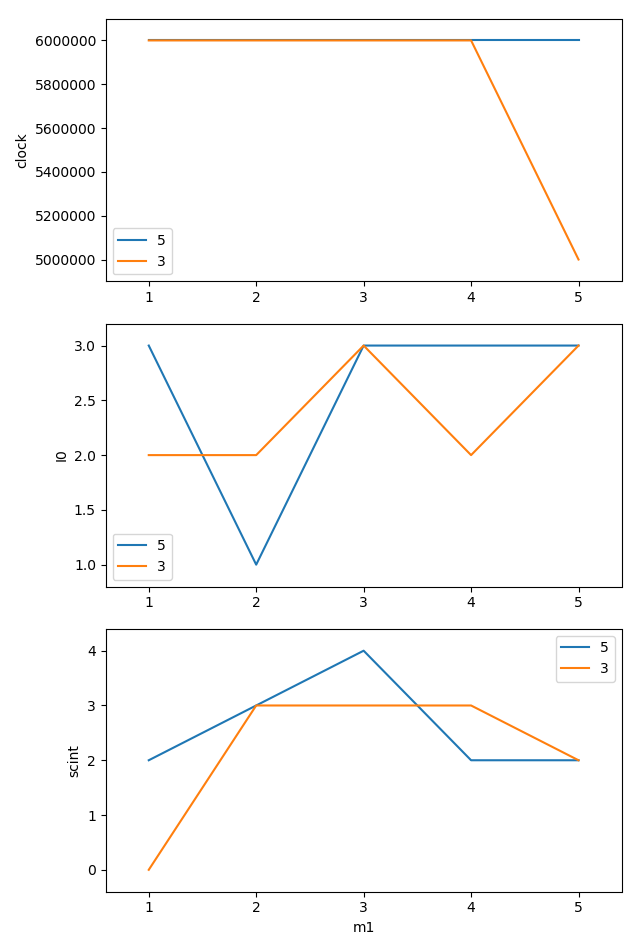

|         1 | 22:57:42.0 |    1.00000 |    6000000 |          3 |          2 |
|         2 | 22:57:44.1 |    2.00000 |    6000000 |          1 |          3 |
|         3 | 22:57:46.1 |    3.00000 |    6000000 |          3 |          4 |
|         4 | 22:57:48.1 |    4.00000 |    6000000 |          3 |          2 |
|         5 | 22:57:50.1 |    5.00000 |    6000000 |          3 |          2 |
+-----------+------------+------------+------------+------------+------------+
generator scan ['a87dc859'] (scan num: 5)





('a87dc859-8b91-4d24-ad42-c9082d8d9e32',)

In [13]:
RE.subscribe(BestEffortCallback())

RE(bp.count([scaler], num=5))
RE(bp.scan([scaler], m1, 1, 5, 5))

In [14]:
mongo_config = dict(
    description = 'heavyweight shared database',
    metadatastore = {
        'module' : 'databroker.headersource.mongo',
        'class' : 'MDS',
        'config' : dict(
            host = 'localhost',
            port = 27017,
            database = 'metadatastore-production-v1',
            timezone = 'US/Central',
        ),
    },
    assets = {
        "module" : 'databroker.assets.mongo',
        "class" : 'Registry',
        "config" : dict(
            host = 'localhost',
            port = 27017,
            database = 'filestore-production-v1',
        ),
    },
)
db = Broker.from_config(mongo_config)

In [15]:
from bluesky.utils import get_history
RE = RunEngine(get_history())
RE.subscribe(db.insert)

from bluesky import SupplementalData
sd = SupplementalData()
RE.preprocessors.append(sd)

# Register bluesky IPython magics.
from bluesky.magics import BlueskyMagics
get_ipython().register_magics(BlueskyMagics)

# Set up the BestEffortCallback.
from bluesky.callbacks.best_effort import BestEffortCallback
bec = BestEffortCallback()
RE.subscribe(bec)
peaks = bec.peaks  # just an alias for less typing

Loading metadata history from C:\Users\Pete/.config/bluesky/bluesky_history.db


In [16]:
RE(bp.scan([scaler], m1, 1, 5, 5))

Transient Scan ID: 3     Time: 2018/11/22 22:58:59
Persistent Unique Scan ID: 'd4e7d299-2d9a-4a2e-9b97-b5d261d71907'
New stream: 'primary'
+-----------+------------+------------+------------+------------+------------+
|   seq_num |       time |         m1 |      clock |         I0 |      scint |
+-----------+------------+------------+------------+------------+------------+
|         1 | 22:59:08.8 |    1.00000 |    6000000 |          2 |          0 |
|         2 | 22:59:11.0 |    2.00000 |    6000000 |          2 |          3 |
|         3 | 22:59:13.1 |    3.00000 |    6000000 |          3 |          3 |
|         4 | 22:59:15.2 |    4.00000 |    6000000 |          2 |          3 |
|         5 | 22:59:17.2 |    5.00000 |    5000000 |          3 |          2 |
+-----------+------------+------------+------------+------------+------------+
generator scan ['d4e7d299'] (scan num: 3)





('d4e7d299-2d9a-4a2e-9b97-b5d261d71907',)

In [17]:
h = db[-1]
h.table()

,time,m1,m1_user_setpoint,clock,I0,scint,scaler_time
seq_num,,,,,,,
1,2018-11-22 22:59:08.845775604,1.0,1.0,6000000.0,2.0,0.0,0.6
2,2018-11-22 22:59:11.014048100,2.0,2.0,6000000.0,2.0,3.0,0.6
3,2018-11-22 22:59:13.124878645,3.0,3.0,6000000.0,3.0,3.0,0.6
4,2018-11-22 22:59:15.214265108,4.0,4.0,6000000.0,2.0,3.0,0.6
5,2018-11-22 22:59:17.221467972,5.0,5.0,5000000.0,3.0,2.0,0.5


In [19]:
h.start

{'time': 1542949139.5019257,
 'uid': 'd4e7d299-2d9a-4a2e-9b97-b5d261d71907',
 'scan_id': 3,
 'plan_type': 'generator',
 'plan_name': 'scan',
 'detectors': ['scaler'],
 'motors': ['m1'],
 'num_points': 5,
 'num_intervals': 4,
 'plan_args': {'detectors': ["ScalerCH(prefix='xxx:scaler1', name='scaler', read_attrs=['channels', 'channels.chan01', 'channels.chan01.s', 'channels.chan02', 'channels.chan02.s', 'channels.chan03', 'channels.chan03.s', 'time'], configuration_attrs=['channels', 'channels.chan01', 'channels.chan01.chname', 'channels.chan01.preset', 'channels.chan01.gate', 'channels.chan02', 'channels.chan02.chname', 'channels.chan02.preset', 'channels.chan02.gate', 'channels.chan03', 'channels.chan03.chname', 'channels.chan03.preset', 'channels.chan03.gate', 'channels.chan04', 'channels.chan04.chname', 'channels.chan04.preset', 'channels.chan04.gate', 'channels.chan05', 'channels.chan05.chname', 'channels.chan05.preset', 'channels.chan05.gate', 'channels.chan06', 'channels.chan06.chname', 'channels.chan06.preset', 'channels.chan06.gate', 'channels.chan07', 'channels.chan07.chname', 'channels.chan07.preset', 'channels.chan07.gate', 'channels.chan08', 'channels.chan08.chname', 'channels.chan08.preset', 'channels.chan08.gate', 'channels.chan09', 'channels.chan09.chname', 'channels.chan09.preset', 'channels.chan09.gate', 'channels.chan10', 'channels.chan10.chname', 'channels.chan10.preset', 'channels.chan10.gate', 'channels.chan11', 'channels.chan11.chname', 'channels.chan11.preset', 'channels.chan11.gate', 'channels.chan12', 'channels.chan12.chname', 'channels.chan12.preset', 'channels.chan12.gate', 'channels.chan13', 'channels.chan13.chname', 'channels.chan13.preset', 'channels.chan13.gate', 'channels.chan14', 'channels.chan14.chname', 'channels.chan14.preset', 'channels.chan14.gate', 'channels.chan15', 'channels.chan15.chname', 'channels.chan15.preset', 'channels.chan15.gate', 'channels.chan16', 'channels.chan16.chname', 'channels.chan16.preset', 'channels.chan16.gate', 'channels.chan17', 'channels.chan17.chname', 'channels.chan17.preset', 'channels.chan17.gate', 'channels.chan18', 'channels.chan18.chname', 'channels.chan18.preset', 'channels.chan18.gate', 'channels.chan19', 'channels.chan19.chname', 'channels.chan19.preset', 'channels.chan19.gate', 'channels.chan20', 'channels.chan20.chname', 'channels.chan20.preset', 'channels.chan20.gate', 'channels.chan21', 'channels.chan21.chname', 'channels.chan21.preset', 'channels.chan21.gate', 'channels.chan22', 'channels.chan22.chname', 'channels.chan22.preset', 'channels.chan22.gate', 'channels.chan23', 'channels.chan23.chname', 'channels.chan23.preset', 'channels.chan23.gate', 'channels.chan24', 'channels.chan24.chname', 'channels.chan24.preset', 'channels.chan24.gate', 'channels.chan25', 'channels.chan25.chname', 'channels.chan25.preset', 'channels.chan25.gate', 'channels.chan26', 'channels.chan26.chname', 'channels.chan26.preset', 'channels.chan26.gate', 'channels.chan27', 'channels.chan27.chname', 'channels.chan27.preset', 'channels.chan27.gate', 'channels.chan28', 'channels.chan28.chname', 'channels.chan28.preset', 'channels.chan28.gate', 'channels.chan29', 'channels.chan29.chname', 'channels.chan29.preset', 'channels.chan29.gate', 'channels.chan30', 'channels.chan30.chname', 'channels.chan30.preset', 'channels.chan30.gate', 'channels.chan31', 'channels.chan31.chname', 'channels.chan31.preset', 'channels.chan31.gate', 'channels.chan32', 'channels.chan32.chname', 'channels.chan32.preset', 'channels.chan32.gate', 'count_mode', 'delay', 'auto_count_delay', 'freq', 'preset_time', 'auto_count_time', 'egu'])"],
  'num': 5,
  'args': ["EpicsMotor(prefix='xxx:m1', name='m1', settle_time=0.0, timeout=None, read_attrs=['user_readback', 'user_setpoint'], configuration_attrs=['user_offset', 'user_offset_dir', 'velocity', 'acceleration', 'motor_egu'])",
   1,
   5],
  'per_step': 'None'},
 'hints': {'dimensions': [[['m1'], 'primary']]},
 'plan_pattern': 'inner_product',
 'plan_pattern_mod

In [20]:
h.stop

{'run_start': 'd4e7d299-2d9a-4a2e-9b97-b5d261d71907',
 'time': 1542949157.228303,
 'uid': '5fd2b957-5335-4eb7-8424-d2922281a09f',
 'exit_status': 'success',
 'num_events': {'primary': 5}}